## COVID-19 ECONOMIC IMPACT ON BUSINESS FAILURE FRANCE (Before, during, and after)2014-2024. 
#### Introduction 
The number of business failures fell sharply during the Covid crisis. Public support prevented many companies from going bankrupt, particularly the smallest and those in the sectors most affected by the crisis. However,an analysis of the companies that failed shows that the market selection continued to play a role, with the most fragile companies continuing to enter into legal proceedings during the crisis. <br> French government support for businesses during the COVID-19 pandemic induced economic crisis helped avert a wave of bankruptcies. in 2020, support measures led to a record-breaking year-on-year drop in the number of business failures (i.e.court-ordered reorganizations or liquidations), with 31,000 recorded that year, compared to 50,000 in 2019. This trend continued in 2021, with a total of 40,000 bankruptcies "avoided" from March 2020 to October 2021, or a 45% decline compared to the equivalent pre-pandemic period. <br> Business failures are a critical economic indicator, reflecting financial health, policy effectiveness, and external disruptions. This report examines failure trends across:
* Time periods (pre-pandemic, pandemic, post-pandemic 2014-2024).
* Regional Variations (Most affected vs. least affected regions).
* Seasonal patterns (Quarterly trends).
The goal is to provide **actionable insights for policymakers,business, and investors**.
### Key insights 
1. Did failure spike, remain stable, or decrease after COVID-19?
2. Did Businesses bounce back after COVID-19 or are failure still rising?
3. Which regions suffered the most and which bounced back the fastest?
4. Are there Seasonal patterns where failures spike in certain months?

**Lets begin by importing our data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Bf = pd.read_csv("business_failures_franceData_2014-2024 - Copy.csv")
Bf

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear
0,2025-Q1,G2025,1/1/2025,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2025
1,2018-Q1,G2018,1/1/2018,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2018
2,2018-Q1,G2018,1/1/2018,Q1,44,1,Low,Cher,Bourges,Centre-ValdeLoire,Central,D,2018
3,2018-Q1,G2018,1/1/2018,Q1,87,2,Medium,Côtes-d'Armor,SaintBrieuc,Bretagne,NorthWest,D,2018
4,2018-Q1,G2018,1/1/2018,Q1,116,3,High,Dordogne,\tPérigueux,Nouvelle-Aquitaine,SouthWest,D,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,2017-Q4,G2017,1/10/2017,Q4,139,3,High,Martinique,Fort-de-France,Nil,Nil,C,2017
4969,2017-Q4,G2017,1/10/2017,Q4,7,1,Low,FrenchGuiana,Cayenne,Nil,Nil,C,2017
4970,2017-Q4,G2017,1/10/2017,Q4,110,3,High,Guadeloupe,Basse-Terre,Nil,Nil,C,2017
4971,2017-Q4,G2017,1/10/2017,Q4,9,1,Low,FrenchTeritories,Nil,Nil,Nil,C,2017


In [4]:
#RENAME COLUMN IF NEEDED 
Bf.rename(columns={"CalandarYear":"CalendarYear"},inplace=True)

#CONVERT "YEAR" COLUMN TO DATETIME FORMAT 
Bf["Year"]= pd.to_datetime(Bf["Year"],format="%d/%m/%Y", errors="coerce") 

# TRIM WHITESPACE IN OBJECT COLUMNS 
Bf=Bf.apply(lambda x: x.str.strip() if x.dtype=="object" else x)

#SET PLOT STYLE  
sns.set_theme(style="whitegrid") 
Bf

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalendarYear
0,2025-Q1,G2025,2025-01-01,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2025
1,2018-Q1,G2018,2018-01-01,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2018
2,2018-Q1,G2018,2018-01-01,Q1,44,1,Low,Cher,Bourges,Centre-ValdeLoire,Central,D,2018
3,2018-Q1,G2018,2018-01-01,Q1,87,2,Medium,Côtes-d'Armor,SaintBrieuc,Bretagne,NorthWest,D,2018
4,2018-Q1,G2018,2018-01-01,Q1,116,3,High,Dordogne,Périgueux,Nouvelle-Aquitaine,SouthWest,D,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,2017-Q4,G2017,2017-10-01,Q4,139,3,High,Martinique,Fort-de-France,Nil,Nil,C,2017
4969,2017-Q4,G2017,2017-10-01,Q4,7,1,Low,FrenchGuiana,Cayenne,Nil,Nil,C,2017
4970,2017-Q4,G2017,2017-10-01,Q4,110,3,High,Guadeloupe,Basse-Terre,Nil,Nil,C,2017
4971,2017-Q4,G2017,2017-10-01,Q4,9,1,Low,FrenchTeritories,Nil,Nil,Nil,C,2017


## Total Business Failures over time (2014-2024)

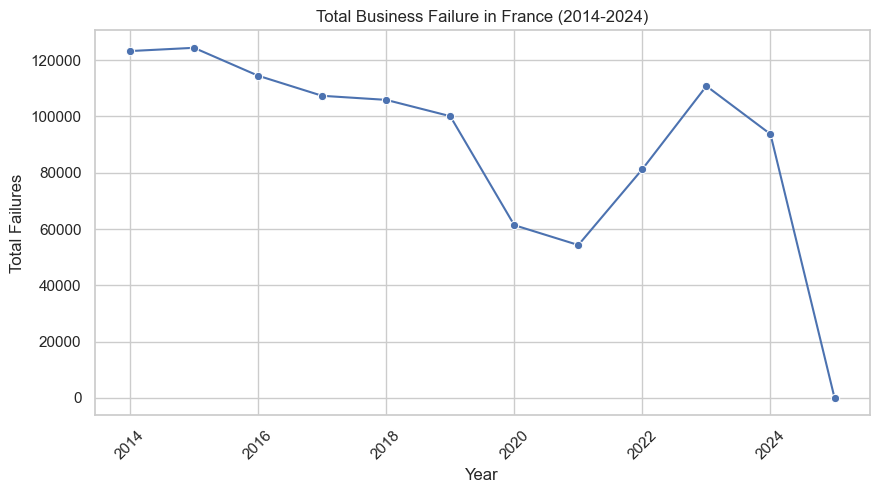

In [6]:
failures_by_year = Bf.groupby("CalendarYear")["FailureUnit"].sum().reset_index() 
plt.figure(figsize=(10,5)) 
sns.lineplot(data=failures_by_year,x="CalendarYear",y="FailureUnit",marker="o",color="b") 
plt.title("Total Business Failure in France (2014-2024)") 
plt.xlabel("Year")
plt.ylabel("Total Failures")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Interpretation: 
* Look for any **sharp increases** around 2020-2021 (COVID-19 period).
* If failures **drop after 2022,** it suggests recovery.
* If failures remain **high or rising post-2022,** businesses are still struggling.

## Regions with Highest Business Failures (2014-2024)

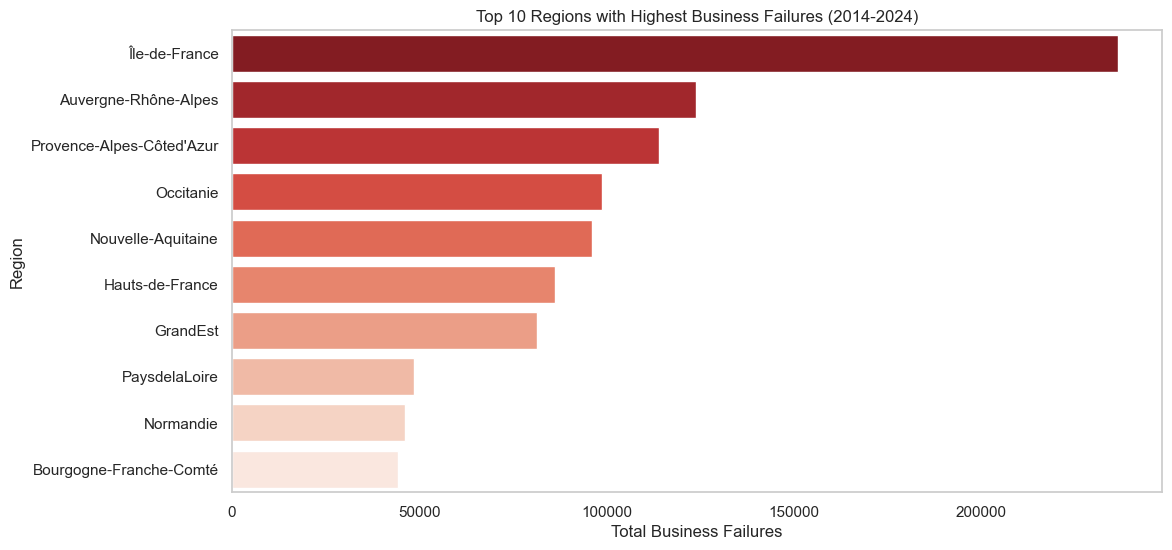

In [15]:
failures_by_region=Bf.groupby("Region")["FailureUnit"].sum().reset_index() 
failure_by_region= failures_by_region.sort_values(by="FailureUnit",ascending=False).head(10)
plt.figure(figsize=(12,6)) 
sns.barplot(data=failure_by_region,x="FailureUnit",y="Region", palette="Reds_r",hue="Region",legend=False) 
plt.title("Top 10 Regions with Highest Business Failures (2014-2024)") 
plt.xlabel("Total Business Failures")
plt.ylabel("Region")
plt.grid(axis="x")

plt.show()

### Interpretation: 
* The **top region** had the most business closure__ why? Economic downturn? Industry reliance?
* If Paris or major cities rank high, it could be due to high business density.
* If rural areas are affected, it could indicate local economic struggles.

## Business Failures Across Economic Cycles: 
* Pre-Pandemic (2014-2019)
* Pandemic (2020-2021)
* Post-Pandemic (2022-2024)

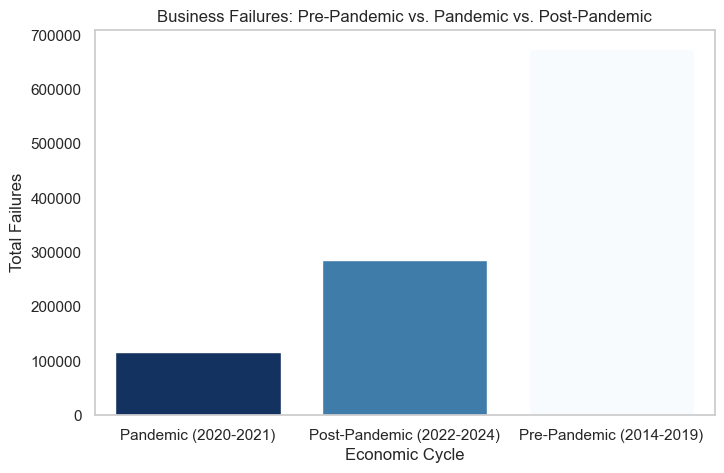

In [25]:
Bf["EconomicCycle"]= Bf["CalendarYear"].apply(lambda x:"Pre-Pandemic (2014-2019)" 
if 2014 <= x <= 2019 
else "Pandemic (2020-2021)" if 2020 <= x <= 2021 
else "Post-Pandemic (2022-2024)")

failures_by_cycle=Bf.groupby("EconomicCycle")["FailureUnit"].sum().reset_index() 

plt.figure(figsize=(8,5))
sns.barplot(data=failures_by_cycle, x="EconomicCycle", y="FailureUnit", palette="Blues_r", hue="FailureUnit", legend=False) 
plt.title("Business Failures: Pre-Pandemic vs. Pandemic vs. Post-Pandemic") 
plt.xlabel("Economic Cycle") 
plt.ylabel("Total Failures")
plt.grid(axis="y")

plt.show()

### Interpretation:
* If **pandemic failures are significantly higher,** Covid-19 had a major economic impact.
* If **post pandemic failures remain high,** businesses are still struggling.
* A **drop in post-pandemic failures** suggests economic recovery.

## Quarterly Business Failures Heatmap (2014-2024)

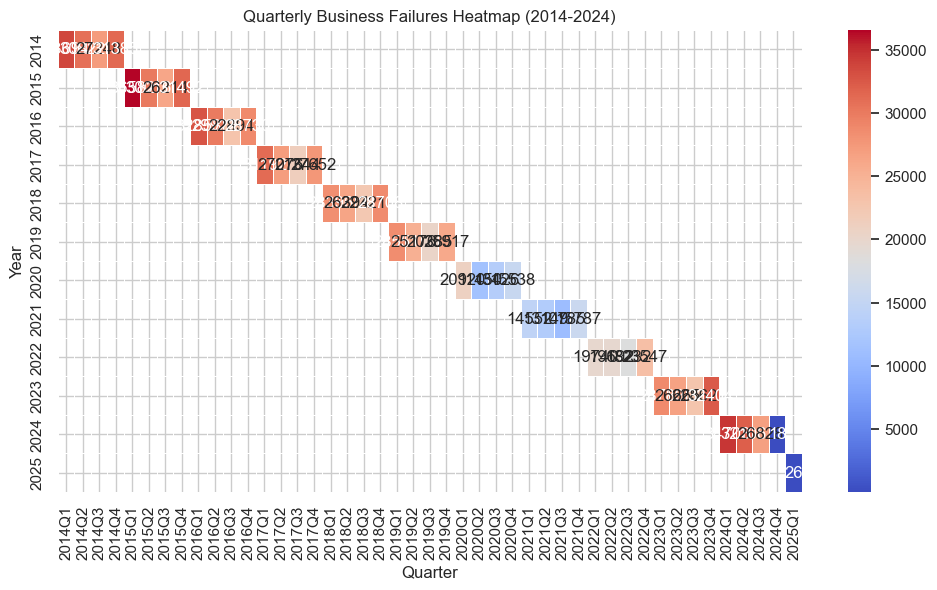

In [27]:
Bf["Quarter"] = Bf["Year"].dt.to_period("Q")
failures_by_quarter = Bf.groupby(["CalendarYear","Quarter"])["FailureUnit"].sum().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(failures_by_quarter,cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Quarterly Business Failures Heatmap (2014-2024)")
plt.xlabel("Quarter")
plt.ylabel("Year")

plt.show()

### Interpretation: 
* **Redder shades** indicate higher failures in specific quarters.
* If failures peakin Q1, it could be due to post-holiday slowdowns.
* If failures increases in **Q2-Q3,** it might indicate mid-year financial struggles.
* A **gradual decrease post-202** would suggest economic recovery.
___

# Summary of Findings And Recommendations 
## 1. Trend Analysis (2014-2024)
* Business failures remained relevantly stable **before 2020**
* **Sharp increase in 2020-2021,** confirming the impact of Covid-19.
* **Mixed trends post-pandemic (2022-2024)**:
  * If Failures decreased **'n** businesses are recovering.
  * If failures remained high **'n** economic struggles persist.

**RECOMMENDATION:** Government and financial institutions should continue providing **post pandemic relief programs** to support businesses still struggling.
___
## 2. Regional Impact 
* Certain regions had **significantly higher failures** than others.
* If **urban areas like paris dominate,** high business density may explain the numbers.
* if **rural regions suffered more** it could indicate localized economic downturns.

**RECOMMENDATION:** 
* **Targeted economic policies** should be developed for **hardest-hit regions.
* If rural areas were affected, support **small businesses and local industries**
___
## 3. Pre-Pandemic vs. Pandemic vs. Post-Pandemic Comparison 
* **Massive failure spike during the pandemic,** proving COVID-19's economic disruption.
* If failures **remain high post-pandemic,** industries may still be struggling.

**RECOMMENDATION:** 
* Support **long-term financial assistance and tax relief** for affected businesses.
* If failures are **still rising post-2022,** assess underlying economic factors like inflation,labor shortages, or supply chain issues.
___
## 4. Seasonality Trends (Quarterly Patterns)
* If failures **spike in Q1**, post-holiday slowdowns may be a factor.
* If failures **peak in Q2/Q3**, it could relate to financial cycles or industry-specific trends.
* If failures **gradually decrease post-2021,** recovery is in progress.

**RECOMMENDATION** 
* **Seasonal financial support** (e.g, grants during Q1) to help businesses through difficult quarters.
* **Further analysis of specific industries** (if data allows) to pinpoint vulnerable sectors.